In [39]:
import os# accessing the directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import cv2
import glob
from keras.preprocessing import image
import random
import seaborn as sns

In [4]:
breast_img_1 = os.listdir(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')

for imgname in breast_img_1[:3]:
    print(imgname)
    img = cv2.imread(imgname)
    #img_res = cv2.resize(img, dsize=(128,128))
breast_img_0= os.listdir(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer')
for img in breast_img_0[:2]:
    print(img)
#breast_img_0= os.listdir()


10253_idx5_x551_y301_class1.png
10253_idx5_x851_y401_class1.png
10254_idx5_x1651_y1101_class1.png
10253_idx5_x1001_y1001_class0.png
10253_idx5_x1001_y1101_class0.png


In [5]:
breast_img1 = glob.glob(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')
breast_img0= glob.glob(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer')


N_IDC = []
P_IDC = []

for i in breast_img0:
    N_IDC.append(i)
for i in breast_img1:
    P_IDC.append(i)
    
N_IDC

['C:\\Users\\Derrick\\Downloads\\finalYearTrials\\BreastCancer\\train\\0_NoCancer']

1

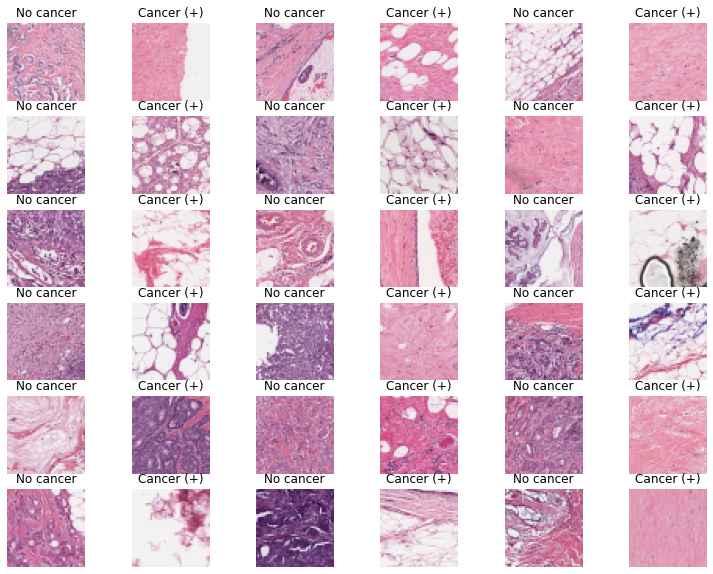

In [6]:
%matplotlib inline

plt.figure(figsize=(13,10))
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = os.path.join(folder,filename)
        images.append(img)
    return images

img_list1= load_images_from_folder(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')
img_list0= load_images_from_folder(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer')

some_non = np.random.randint(0, len(img_list1), 18)
some_can= np.random.randint(0,len(img_list0), 18)
s = 0
for num in some_non:
    
        img = image.load_img((img_list1[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('No cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s=1
for num in some_can:
    
        img = image.load_img((img_list0[num]), target_size=(100,100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('Cancer (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

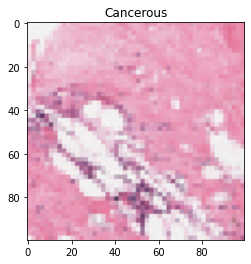

In [7]:

def load_images_from_folders(folder):
    images1 = []
    for filename in os.listdir(folder):
        img1 =os.path.join(folder,filename)
        images1.append(img1)
    return images1

img_list1=load_images_from_folders(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')


#some_non = np.random.randint(0, len(img_list1), 18)
#some_non
img = image.load_img((img_list1[4000]), target_size=(100, 100))
plt.title("Cancerous")
plt.imshow(img)


Handling Images

In [8]:
cancerous=[]

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = os.path.join(folder,filename)
        images.append(img)
    return images

img_list1= load_images_from_folder(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')
for img in img_list1:
    
    n_img= cv2.imread(img,cv2.IMREAD_COLOR)
    n_img_resized= cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    cancerous.append([n_img_resized,1])


In [9]:
non_cancerous=[]
img_list0= load_images_from_folder(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer')

for img in img_list0:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_cancerous.append([c_img_size, 0])

In [172]:
len(non_cancerous)

13911

In [10]:
c_img_size.shape

(50, 50, 3)

In [165]:
X = []
y = []

breast_img_arr = np.concatenate((non_cancerous, cancerous))
random.shuffle(breast_img_arr)

for key, value in breast_img_arr:
    X.append(key)
    y.append(value)
#print(y.value_counts())
X= np.array(X)
y= np.array(y)

In [12]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 19426
Number of IDC(-) Images: 18560
Number of IDC(+) Images: 866
Image shape (Width, Height, Channels): (50, 50, 3)


In [156]:
np.sum(y==1)

866

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train= to_categorical(Y_train, num_classes=2)
Y_test= to_categorical(Y_test, num_classes=2)
    
print("X_training shape", X_train.shape)
print("Xtesting shape", X_test.shape)

X_training shape (13598, 50, 50, 3)
Xtesting shape (5828, 50, 50, 3)


In [14]:
Y_test.shape

(5828, 2)

In [17]:
#reduce the training sizes
X_train = X_train[0:5000] 
Y_train = Y_train[0:5000] 
X_test = X_test[0:3000] 
Y_test = Y_test[0:3000] 

In [18]:
X_train.shape

(5000, 50, 50, 3)

In [130]:
Y_test.shape

(3000, 2)

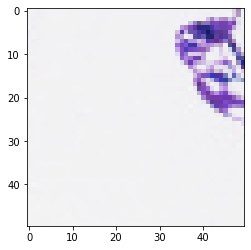

In [19]:
plt.imshow(X_train[20])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import binary_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
import itertools

In [21]:
from tensorflow.keras.models import Sequential

model= Sequential()

CNN LAYERS

In [22]:
from tensorflow.keras.layers import Dense, MaxPooling2D,Dropout, Conv2D, Flatten, BatchNormalization

In [ ]:
model.add(Dense(units= 512, activation="relu", input_shape=(50,50,3)))

In [ ]:
model.add(Dense(units= 512, activation ="relu"))
model.add(Dense(units= 512, activation ="relu"))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units=512, activation = "relu"))

In [ ]:
model.add(Dense(units= 10, activation ="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= "adam", loss= "binary_crossentropy", metrics= "accuracy")

In [23]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [24]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                      

In [26]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 11, batch_size = 35,  callbacks=[early_stop])

Epoch 1/11
143/143 [==============================] - 170s 1s/step - loss: 0.3600 - accuracy: 0.9074 - val_loss: 0.1836 - val_accuracy: 0.9570
Epoch 2/11
143/143 [==============================] - 187s 1s/step - loss: 0.1972 - accuracy: 0.9550 - val_loss: 0.1599 - val_accuracy: 0.9570
Epoch 3/11
143/143 [==============================] - 192s 1s/step - loss: 0.1639 - accuracy: 0.9554 - val_loss: 0.1553 - val_accuracy: 0.9570
Epoch 4/11
143/143 [==============================] - 199s 1s/step - loss: 0.1532 - accuracy: 0.9562 - val_loss: 0.1475 - val_accuracy: 0.9570
Epoch 5/11
143/143 [==============================] - 193s 1s/step - loss: 0.1482 - accuracy: 0.9560 - val_loss: 0.1512 - val_accuracy: 0.9573
Epoch 6/11
143/143 [==============================] - 194s 1s/step - loss: 0.1392 - accuracy: 0.9560 - val_loss: 0.1443 - val_accuracy: 0.9570
Epoch 7/11
143/143 [==============================] - 193s 1s/step - loss: 0.1324 - accuracy: 0.9560 - val_loss: 0.1648 - val_accuracy: 0.9530

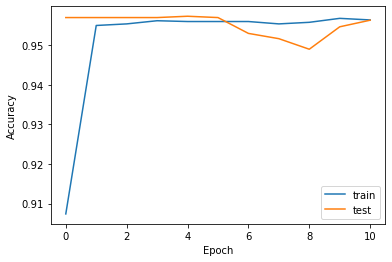

In [35]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")



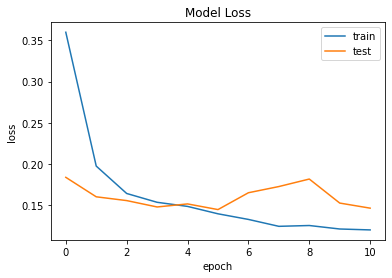

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [41]:
Y_test.shape

(3000, 2)

In [151]:
Y_test.value_counts

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

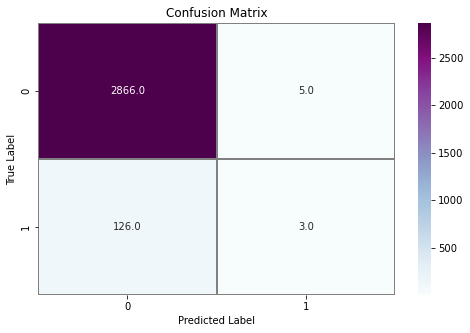

In [57]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [60]:
import pandas as pd

df= pd.DataFrame(Y_test)
df

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2995,1.0,0.0
2996,1.0,0.0
2997,1.0,0.0
2998,1.0,0.0


In [56]:
Y_true.shape

(2,)

In [150]:
Y_pred

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

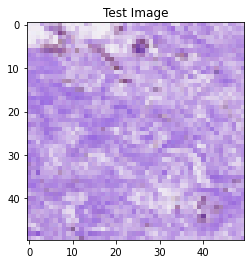

In [139]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 169
img_plot(X_test, index)

In [140]:
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

Predicted Value using  cnn model 0
True Value 0


In [147]:
l=[]
if Y_test.argmax()==1:
    print(Y_test)
else:
    print({0})

{0}


In [149]:
Y_test[89].argmax()

0

In [66]:
X[100].shape

(50, 50, 3)

In [132]:
img_list1= load_images_from_folder(r"C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer")
n_img= cv2.imread(img_list1[128],cv2.IMREAD_COLOR)
n_img_resized= cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)



# resize tensor to 224 x 224
#tensor = tf.image.resize(n_img, [50, 50])
input_tensor = tf.expand_dims(n_img_resized, axis=0)

input_tensor.shape
# (224, 224, 3)
#pred= model.predict(n_img)

TensorShape([1, 50, 50, 3])

In [136]:
import tensorflow as tf

# load image via tf.io
img = tf.io.read_file(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer\10253_idx5_x1001_y1001_class0.png')
# convert to tensor (specify 3 channels explicitly since png files contains additional alpha channel)
# set the dtypes to align with pytorch for comparison since it will use uint8 by default
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
# (384, 470, 3)

# resize tensor to 224 x 224
tensor = tf.image.resize(tensor, [50, 50])
# (224, 224, 3)

# add another dimension at the front to get NHWC shape
input_tensor = tf.expand_dims(tensor, axis=0)
# (1, 224, 224, 3)

In [137]:
tensor.shape

TensorShape([50, 50, 3])

In [114]:
input_tensor.shape

TensorShape([1, 50, 50, 3])

In [138]:

pred= model.predict(tensor)
classes = np.argmax(pred, axis = 1)
print(classes)

ValueError: in user code:

    File "H:\ananconda1\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "H:\ananconda1\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "H:\ananconda1\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "H:\ananconda1\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "H:\ananconda1\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "H:\ananconda1\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 50, 50, 3), found shape=(None, 50, 3)


In [157]:
classOne= img_list1= load_images_from_folder(r"C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer")
classZero= load_images_from_folder(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer')

In [160]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [161]:
X,Y = proc_images(0,5000)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1] 

NameError: name 'imagePatches' is not defined

In [ ]:
early_stop= EarlyStopping(monitor="val_loss", patience =2)
model.fit(X_train, Y_train, epochs=10, verbose=1, validation_data= (X_test, Y_test), callbacks=[early_stop])

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
for image in img_list[:3]:
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    plt.imshow(image)

In [ ]:
for image in img_list[10]:
    for i in range(10):
        #file= random.choice(img_list)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255
        ax=plt.subplot(1,10,i+1)
        #ax.title.set_text(file)
        plt.imshow(image)

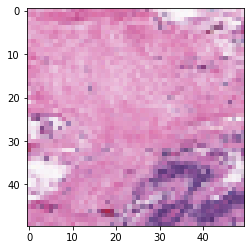

In [92]:
#img_path= r"'C:\\Users\\Derrick\\Downloads\\finalYearTrials\\BreastCancer\\train\\1_Cancer\\10253_idx5_x551_y301_class1.png'"
image_path= r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\0_NoCancer\10253_idx5_x1001_y1001_class0.png'
img=mpimg.imread(image_path)
plt.imshow(img)

In [ ]:
from keras.preprocessing import 

In [ ]:
#pip install opencv-python


In [ ]:
#pip install scikit-image

In [ ]:
breast_img= glob.glob(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer/train')
breast_img

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200

def create_dataset(img_folder):
   
    img_data_array=[]
    #class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            #class_name.append(dir1)
    return img_data_array
img_data =create_dataset(r'C:\Users\Derrick\Downloads\finalYearTrials\BreastCancer\train\1_Cancer')
